In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#Import dataframe from JSON file
jsonStr = "parameters_df.json"
df = pd.read_json(jsonStr, orient ='index')
print(df.head)

<bound method NDFrame.head of                                                    red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.7112  2.8076   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.7464  2.0908   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.6620  2.2704   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.8940  2.2452   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  3.0032  2.5404   
...                                                ...     ...     ...   
data/13666/1/13666_idx5_x901_y1101_class1.png   2.1980  2.3572  2.7020   
data/13666/1/13666_idx5_x1051_y1001_class1.png  2.6968  2.4552  2.5280   
data/13666/1/13666_idx5_x1051_y1151_class1.png  2.4272  2.8244  2.5152   
data/13666/1/13666_idx5_x1051_y1051_class1.png  2.5724  2.3860  2.5444   
data/13666/1/13666_idx5_x901_y1151_class1.png   2.7212  2.7648  3.0000   

                                                    gray  gray_var  edges  \
data

## Splitting in train and test set.

In [9]:
X= df[['red','green','blue','gray','gray_var','edges','ridges']]
y=df['group']
  
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, shuffle=False)

print('X_train : ')
print(X_train.head())
print(X_train.shape)
print('')
print('X_val : ')
print(X_val.head())
print(X_val.shape)
print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)
print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)
print('')
print('y_val : ')
print(y_val.head())
print(y_val.shape)
print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)



#Split: 70% train, 10% validation and 20% test.

X_train : 
                                                   red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.7112  2.8076   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.7464  2.0908   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.6620  2.2704   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.8940  2.2452   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  3.0032  2.5404   

                                                    gray  gray_var  edges  \
data/12910/0/12910_idx5_x3001_y701_class0.png   0.755730  0.003960     83   
data/12910/0/12910_idx5_x1501_y401_class0.png   0.483340  0.009377    350   
data/12910/0/12910_idx5_x2251_y1101_class0.png  0.799321  0.001401     14   
data/12910/0/12910_idx5_x2551_y1151_class0.png  0.824825  0.001107      0   
data/12910/0/12910_idx5_x2001_y101_class0.png   0.675241  0.005805    187   

                                                ridges  
data/12910/0/12910_idx5_

## Single decision tree classifier

Accuracy for max_depth of 1 is: 0.6743775447699348
Accuracy for max_depth of 2 is: 0.7307678449176666
Accuracy for max_depth of 3 is: 0.7611069073613663
Accuracy for max_depth of 4 is: 0.7845277987965265
Accuracy for max_depth of 5 is: 0.7894281699275754
Accuracy for max_depth of 6 is: 0.7789067848520881
Accuracy for max_depth of 7 is: 0.7786905920080712
Accuracy for max_depth of 8 is: 0.7880949807228047
Accuracy for max_depth of 9 is: 0.7860051165639751
Accuracy for max_depth of 10 is: 0.794004251792599
Accuracy for max_depth of 11 is: 0.7932115446978705
Accuracy for max_depth of 12 is: 0.7865816308146867
Accuracy for max_depth of 13 is: 0.7835909631391201
Accuracy for max_depth of 14 is: 0.7725290959535906
Accuracy for max_depth of 15 is: 0.7697906532627103
Accuracy for max_depth of 16 is: 0.7661153749144237
Accuracy for max_depth of 17 is: 0.7579721111231218
Accuracy for max_depth of 18 is: 0.7540806399308183
Accuracy for max_depth of 19 is: 0.748243433142363
Accuracy for max_depth 

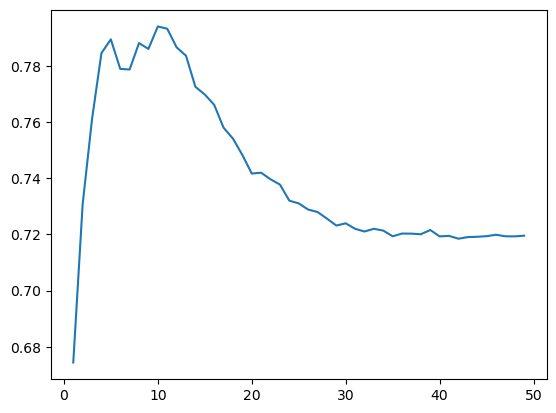

In [10]:
#Single decision tree with different depths, to see what is proper.
acc_for_depths = []

st = time.time()
for d in range(1,50):
    model = DecisionTreeClassifier(max_depth = d)
    model = model.fit(X_train, y_train)
    accuracy = model.score(X_val, y_val)
    acc_for_depths.append(accuracy)
    print(f'Accuracy for max_depth of {d} is: {accuracy}')
    
et = time.time()
elapsed_time = et - st
print(f'Execution time: {elapsed_time}s')
    
plt.plot(range(1,50), acc_for_depths)
plt.show()
#Observing in the plot that max_depth = 11 gives the highest accuracy when validating.

### Final test of decision tree with max_depth = 10

Accuracy for max_depth of 10 is: 0.798991081884515
Execution time: 1.7575926780700684s


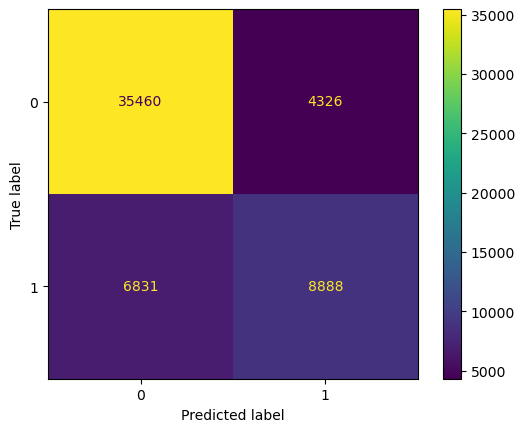

In [12]:
st = time.time()
depth = 10
model = DecisionTreeClassifier(max_depth = depth)
model = model.fit(X_train, y_train)

predicted_value = model.predict(X_test)

#To plot the actual decision tree
#tree.plot_tree(model)

accuracy = model.score(X_test, y_test)


print(f'Accuracy for max_depth of {depth} is: {accuracy}')
    
et = time.time()
elapsed_time = et - st
print(f'Execution time: {elapsed_time}s')

ConfusionMatrixDisplay(confusion_matrix(y_test, predicted_value)).plot()

## Random forest classifier

Accuracy for max_depth of 1 is: 0.7875544986127626
Accuracy for max_depth of 2 is: 0.7878427557381183
Accuracy for max_depth of 3 is: 0.7994090728930205
Accuracy for max_depth of 4 is: 0.7943285410586243
Accuracy for max_depth of 5 is: 0.7936078982452347
Accuracy for max_depth of 6 is: 0.793319641119879
Accuracy for max_depth of 7 is: 0.7966345980614709
Accuracy for max_depth of 8 is: 0.7969228551868266
Accuracy for max_depth of 9 is: 0.7949771195906749
Accuracy for max_depth of 10 is: 0.7967426944834792
Accuracy for max_depth of 11 is: 0.7977876265628941
Accuracy for max_depth of 12 is: 0.7990847836269953
Accuracy for max_depth of 13 is: 0.7992289121896732
Accuracy for max_depth of 14 is: 0.7997333621590459
Accuracy for max_depth of 15 is: 0.79944510503369
Accuracy for max_depth of 16 is: 0.7994090728930205
Accuracy for max_depth of 17 is: 0.7986523979389616
Accuracy for max_depth of 18 is: 0.7991568479083342
Accuracy for max_depth of 19 is: 0.7988685907829784
Accuracy for max_depth o

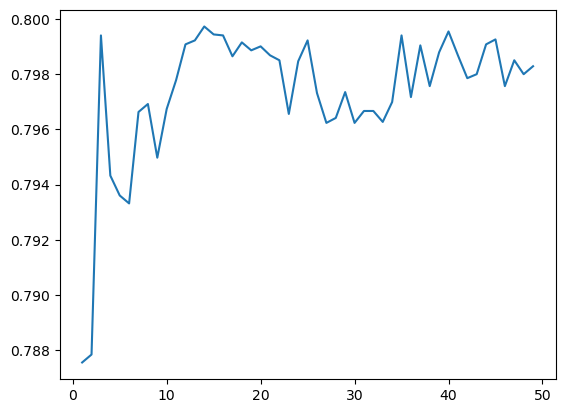

In [14]:
#Random forest classification with different values for max_depth
acc_for_depths = []
for i in range(1,50):
    model = RandomForestClassifier(max_depth = i)

    # fit the regressor with x and y data
    model.fit(X_train, y_train) 

    y_pred = model.predict(X_val)  # test the output by changing values
    #print(y_pred)

    #print("accuracy on training set: %f" % regressor.score(X_train, y_train))
    #print("accuracy on validation set: %f" % regressor.score(X_val, y_val))

    # Create confusion matrix
    #confusion = confusion_matrix(y_val, y_pred)
    #ConfusionMatrixDisplay(confusion).plot()
    # Display accuracy score
    accuracy = model.score(X_val, y_val)
    print(f'Accuracy for max_depth of {i} is: {accuracy}')
    acc_for_depths.append(accuracy)
    
plt.plot(range(1,50), acc_for_depths)
plt.show()

### Final test of random forest

Accuracy for random forest with max_depth = 14: 0.8043599675704891


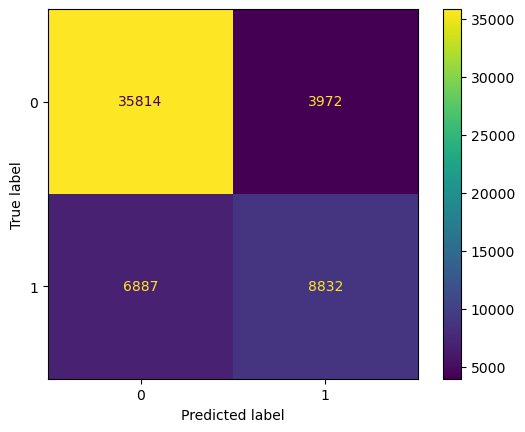

In [15]:
depth = 14 #As found optimal above
model = RandomForestClassifier(max_depth = depth)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f'Accuracy for random forest with max_depth = {depth}: {accuracy}')

# Create confusion matrix
confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion).plot()

### Feature importance for the random forest

In [ ]:
plt.plot(model.feature_importances_, 'o')
plt.xticks(range(X_test.shape[1]), X_test.columns, rotation=90)
plt.ylim(0, 1)